<a href="https://colab.research.google.com/github/prevencao/trading/blob/master/indicador_tecnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.thepythoncode.com/article/introduction-to-finance-and-technical-indicators-with-python

---
# Introdução a finanças e indicadores técnicos com Python
---

In [ ]:
#!pip install pandas-datareader yfinance mpl-finance stockstats
!pip install stockstats

In [ ]:
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as pdr

In [ ]:
#importando os preços das ações Apple
df_aapl = pdr.get_data_yahoo('AAPL', start='2019-01-01', 
                             end='2020-07-30')


In [ ]:
df_aapl.head()

In [ ]:
#importando os preços das ações SPY
df_Spy = pdr.get_data_yahoo('SPY', start='2019-01-01', 
                            end='2019-09-30')

In [ ]:
df_Spy.head()

Uma vela no mercado financeiro é apresentada sob o formato OHLC, que significa "Open-High-Low-Close":

    Aberto: é o preço de uma ação quando uma resolução de tempo começou (1m, 30m, por hora, diariamente, etc)
    Alto: é o preço mais alto alcançado do início ao fim da vela.
    Baixo: é o preço mais baixo atingido do início ao fim da vela.
    Fechar: é o preço de uma ação quando uma resolução de tempo termina.

Distinguimos dois tipos de operações de negociação ao negociar nos mercados financeiros de ações: Long (Compra) e Short (Venda).


# Traçando preços de ações

In [ ]:
df_aapl[['Open', 'High', 'Low', 'Close']].plot()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()

plot_data = []
for i in range (150, len(df_aapl)):
  row = [
         i,
         df_aapl.Open.iloc[i],
         df_aapl.High.iloc[i],
         df_aapl.Low.iloc[i],
         df_aapl.Close.iloc[i],
  ]
  plot_data.append(row)
candlestick_ohlc(ax, plot_data)

plt.show()

## Indicadores Técnicos Financeiros

FinaIn finance, e uma vez que estamos tratando de dados numéricos, contando com vários indicadores teremos uma melhor visualização dos movimentos dos preços das ações, além de detectar tendências que são muito importantes caso pretendamos fazer negócios / investimentos de longo prazo em uma determinada ação .

Da biblioteca [stockstats](https://github.com/jealous/stockstats) importaremos StockDataFrame, que é uma classe que recebe como atributo um DataFrame pandas ordenado por tempo e inclui as colunas Abrir-Fechar-Alto-Baixo nesta ordem Indicadores Técnicos

In [ ]:
from stockstats import StockdataFrame
stocks = StockDataFrame.retype(df_aapl[['Open', 'Close', 
                                        'High', 'Low', 
                                        'Volume']])

# Média Móvel Simples (SMA)

[MédIa Simples](https://www.investopedia.com/terms/s/sma.asp) Média é um indicador que suaviza o gráfico dos preços das ações, computando a média dos preços ao longo de um período de tempo. Isso nos permitirá visualizar melhor as direções das tendências (para cima ou para baixo).

A fórmula de SMA é mostrada na figura a seguir

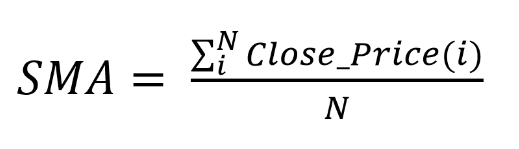

PLotando SMA

In [ ]:
plt.plot(stocks['close_10_sma'], color='b', label='SMA')
plt.plot(df_aapl.Close, color='g', label='Close Prices')
plt.legend(loc='lower right')
plt.show()

Média Móvel Exponencial (EMA)

## Fórmula da EMA
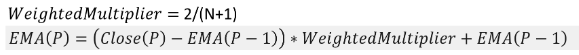

In [ ]:
plt.plot(stocks["close_10_sma"], color="b", label="SMA") # plotando SMA SMA
plt.plot(stocks["close_10_ema"], color="k", label="EMA")
plt.plot(df_aapl.Close, color="g", label="Close prices") # plotando preço de fechamento
plt.legend(loc="lower right")
plt.show()

#Média Móvel Convergência/Divergência (MACD)


[MACD](https://en.wikipedia.org/wiki/MACD) é um indicador de momento de seguição de tendência. Este Indicador pode mostrar mudanças na velocidade do movimento dos preços e os comerciantes o usam para determinar a direção de uma tendência. 

O MACD é calculado subtraindo a Média Móvel Exponencial (EMA) de 26 períodos da EMA de 12 períodos. Um EMA de nove dias do MACD é chamado de "Linha de Sinal", que é então plotado com o MACD. 

Quando o MACD cruza abaixo da Linha de Sinal, é um indicador para começar a fazer operações curtas (Sell). E quando ele cruza acima dele, é um indicador para começar a fazer operações longas (Compre)

In [ ]:
plt.plot(stocks["macd"], color="b", label="MACD")
plt.plot(stocks["macds"], color="g", label="Signal Line")
plt.legend(loc="lower right")
plt.show()

## `Conclusão`

Neste tutorial, nós:

Aprendemos a importar dados financeiros usando bibliotecas 

[Pandas DataReader](https://pandas-datareader.readthedocs.io/en/latest/) e [yfinance](https://github.com/ranaroussi/yfinance/). 
Entendia notações e definições financeiras. 

Familiarizei-me com a notação ohlc.
Aprendi a traçar gráficos de castiçais usando 

[mpl_finance](https://github.com/matplotlib/mplfinance) biblioteca. 
Aprendeu a importância dos indicadores financeiros e implementou 

alguns deles utilizando a biblioteca [stockstats](https://github.com/jealous/stockstats).